In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('titanic_for_mac_users.csv')

In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
df = df[df['age'].notnull()]
df['age'] = df['age'].astype('int')


<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='price'>

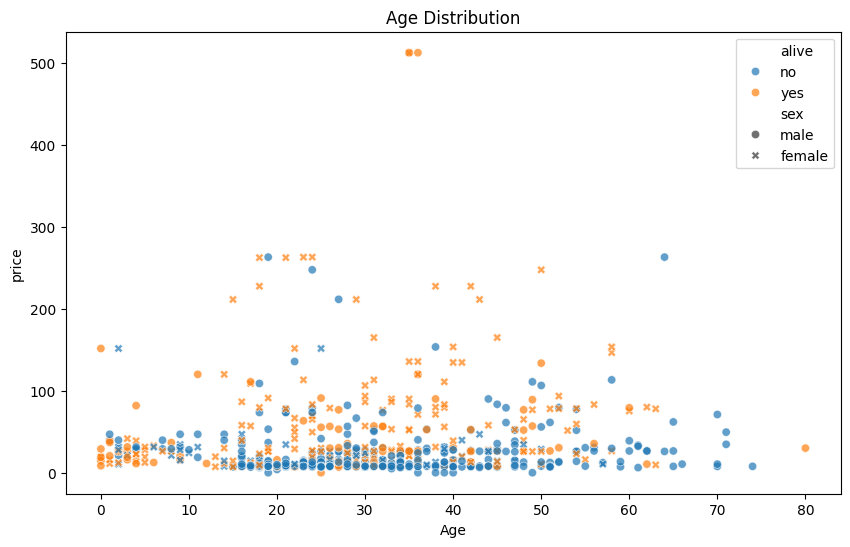

In [19]:
plt.figure(figsize=(10,6))
plt.title('Age Distribution')
plt.xlabel('Age')   
plt.ylabel('price')

sns.scatterplot(
    df,
    x='age',
    y='fare',
    hue='alive',
    #size='pclass',
    style='sex', 
    alpha=0.7
)

In [20]:
df = pd.read_csv('Salary_Data.csv')

In [21]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [ ]:
df['Education Level'] = (
    df['Education Level']
    .astype(str) 
    .str.lower()      
)

df['Education Level'] = df['Education Level'].apply(
    lambda x:
        "Bachelor's" if "bachelor" in x else
        "Master's" if "master" in x else
        "PhD" if "phd" in x else
        "High School"
)


In [44]:
df['Education Level'].value_counts()


Education Level
Bachelor's     3023
Master's       1861
PhD            1369
High School     451
Name: count, dtype: int64

In [49]:
df['filter'] = df['Job Title'].apply(
    lambda x: "Manager" if 'manager' in x.lower() else "Analyst" if 'analyst' in x.lower() else "other"
)

AttributeError: 'float' object has no attribute 'lower'

<Axes: title={'center': 'Опыт работы и Зарплата'}, xlabel='Опыт работы ', ylabel='Зарплата'>

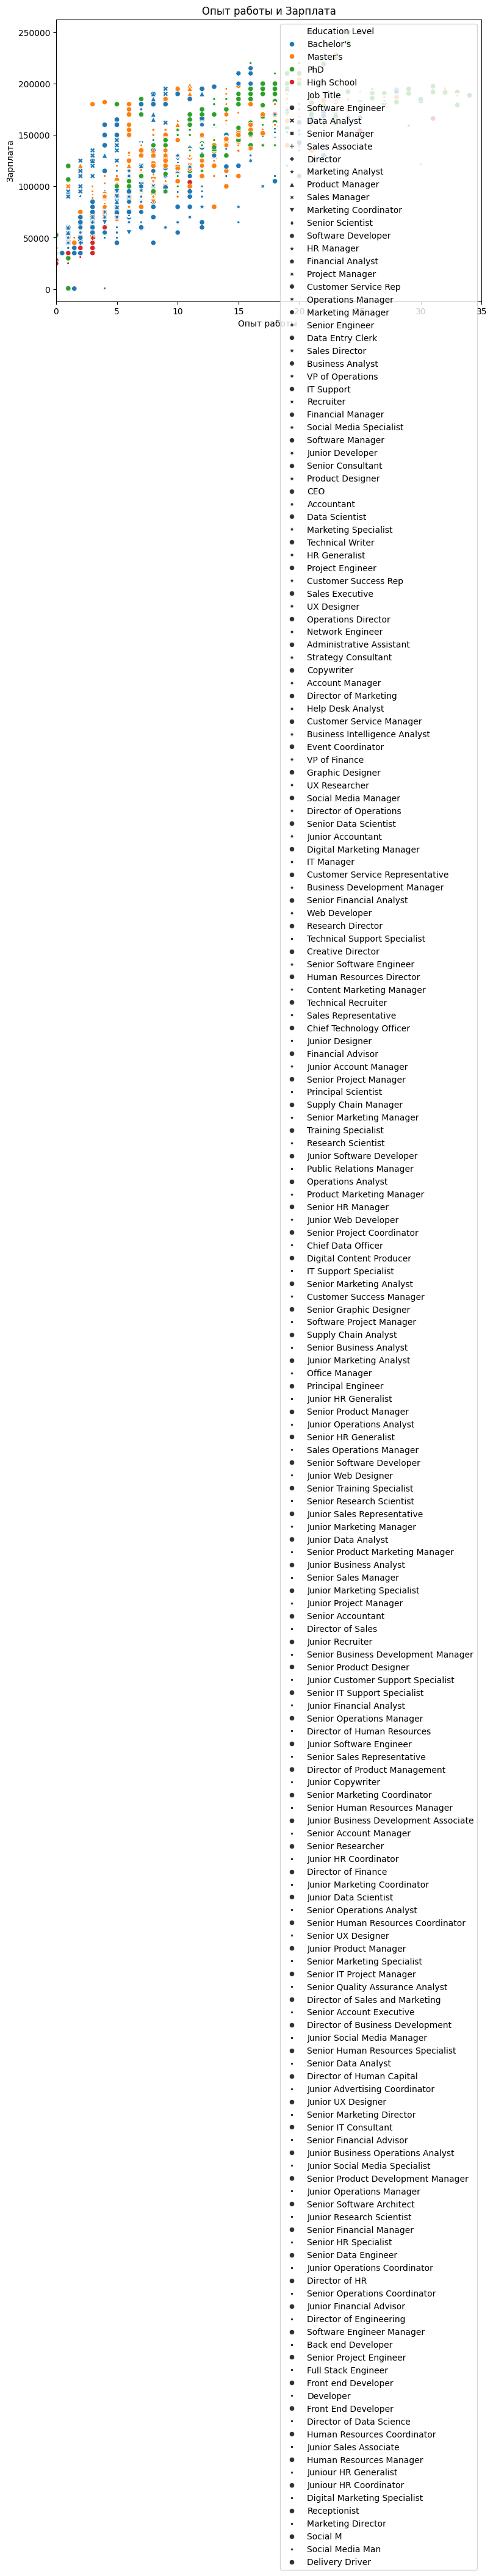

In [48]:
plt.figure(figsize=(9,6))
plt.title('Опыт работы и Зарплата')
plt.xlabel('Опыт работы ')
plt.ylabel('Зарплата')
plt.xlim(0, 35)

sns.scatterplot(
    data=df,                 
    x='Years of Experience',
    y='Salary', 
    hue='Education Level', 
    style='Job Title'
)


In [40]:
df.corr(numeric_only=True, method='spearman')

,Age,Years of Experience,Salary
Age,1.000000,0.946034,0.745502
Years of Experience,0.946034,1.000000,0.859188
Salary,0.745502,0.859188,1.000000
